# Loading and Visualizing raw data

The purpose of this notebook is show how to load and visualize the raw data for one subject at a time. 

First, we start by importing libraries we will need. In addition to the usual Python libraries for data analysis (i.e. `pandas`, `numpy`, `matplotlib`), we will be using `nibabel` to read in image from multiple formats.

In [11]:
import pandas as pd
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt

%matplotlib inline

Now we will load the T1-weighted images for this subject.

In [12]:
T1 = nib.load('../ds000115/sub-01/anat/sub-01_T1w.nii.gz')

## Components of an image object
The image object consist of an image header, an image data array and an affine array. Printing the image object returns the affine and header data.

In [13]:
print(T1)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (176, 256, 256)
affine: 
[[ 9.96775329e-01 -1.48763147e-03 -8.02301541e-02 -8.26823959e+01]
 [-2.98805232e-03  9.98446643e-01 -5.56366481e-02 -1.06932190e+02]
 [ 8.01882967e-02  5.56969717e-02  9.95222449e-01 -1.48407990e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 176 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  1.  1.  1.  2.4 0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice


Let's focus on the image data array for now.

First, let's look at the shape of the image.

In [14]:
T1.shape

(176, 256, 256)

The article describes the T1 weighted image as follows:
> a T1 structural image was acquired using a sagittal MP-RAGE 3D sequence (TR = 2400 ms, TE = 3.16 ms, ﬂip = 8˚; voxel size = 1 mm × 1 mm × 1 mm). 

Therefore, this image consists of 176 slices where the acquisition was from left to right (i.e. the x-dimension). 

We can plot the data by using regular plotting libraries

In [15]:
img = T1.get_fdata()

Text(0.5, 0.98, 'Center slices for EPI image')

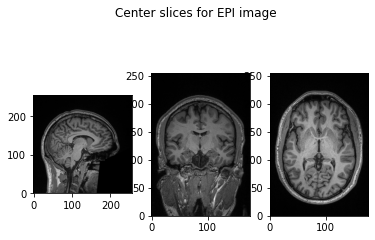

In [16]:
# import matplotlib.pyplot as plt

def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = img[80, :, :]
slice_1 = img[:, 125, :]
slice_2 = img[:, :, 125]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")  

There exists a more elegant option for plotting, however. We can use the plotting functions from `nilearn` to handle plotting directly from feeding it the NIfTI object.

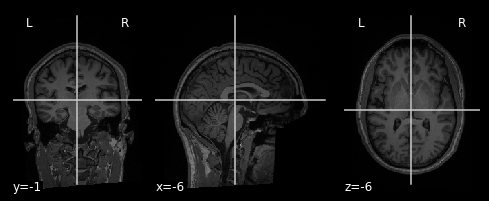

In [17]:
from nilearn.plotting import plot_anat

plot_anat(T1)

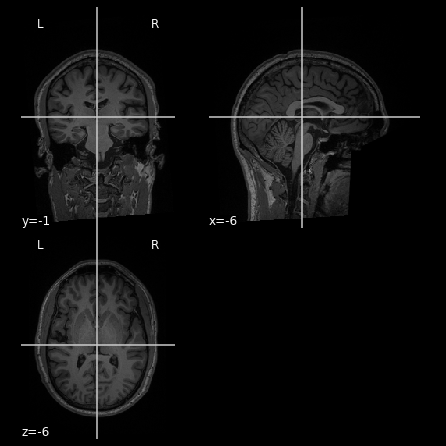

In [18]:
plot_anat(T1,display_mode='tiled')

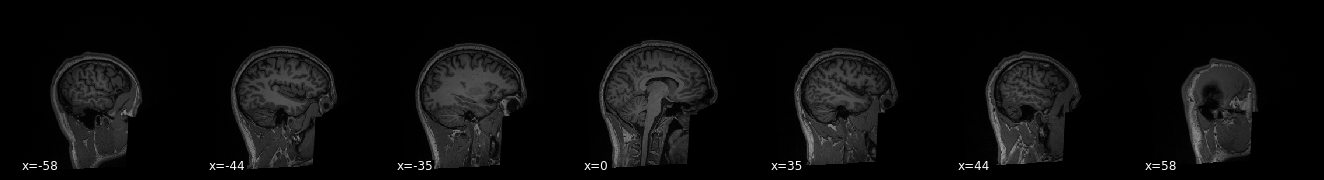

In [19]:
x = T1.shape[0]
plot_anat(T1,
          cut_coords = (-x/3, -x/4, -x/5, 0, 
                       x/5, x/4, x/3),
         display_mode='x')

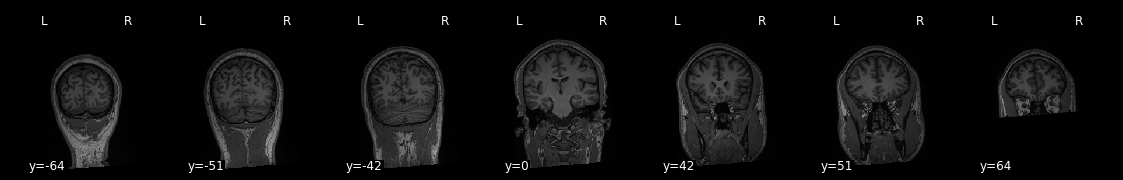

In [20]:
y = T1.shape[1]
plot_anat(T1,
          cut_coords = (-y/4, -y/5, -y/6, 0, 
                       y/6, y/5, y/4), 
          display_mode='y')

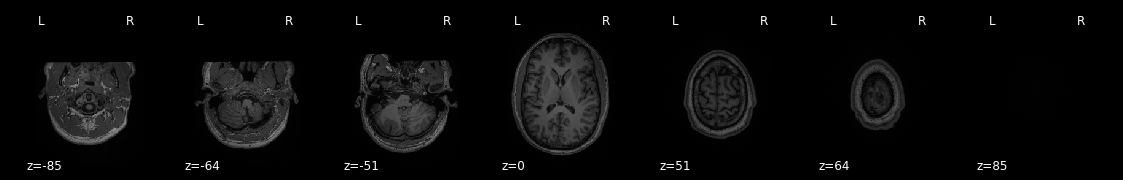

In [21]:
z = T1.shape[2]
plot_anat(T1,
          cut_coords = (-z/3, -z/4, -z/5, 0, 
                       z/5, z/4, z/3),
          display_mode='z')

## Functional images

We can follow similar steps to visualize functional MRI images. Let's load the BOLD run for this subject.

The article describes these images as follows:

>Functional images (BOLD) were acquired using an asymmetric spin-echo, echo-planar sequence (T2 * ; repetition time (TR) = 2500 ms, echo time (TE) = 27 ms, ﬁeld of view (FOV) = 256 mm, ﬂip = 90˚, voxel size = 4 mm × 4 mm × 4 mm).

Printing the BOLD image object we can see that repetition time, echo time and dimensions (256/4) are contained in the metadata.

In [22]:
BOLD = nib.load('../ds000115/sub-01/func/sub-01_task-letter0backtask_bold.nii.gz')
print(BOLD)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (64, 64, 36, 137)
affine: 
[[-3.98474765e+00 -2.33429931e-02 -3.48196089e-01  1.28497971e+02]
 [-5.55499550e-03  3.99477863e+00 -2.04237983e-01 -1.08230286e+02]
 [-3.48933339e-01  2.02975616e-01  3.97957969e+00 -7.30478287e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'?TR:2500.000 TE:27'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  64  64  36 137   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.000000e+00  4.000000e+00  4.000000e+00  4.000001e+00  2.500000e+00
  1.000000e+00  1.000000e+00  5.582918e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       :

To visualize a 4D image statically we use an indexing function that works om nifti-image objects

/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


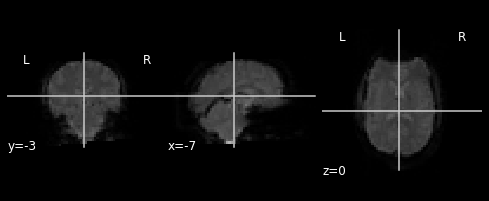

In [23]:
from nilearn.image import index_img

slice0 = index_img(BOLD, 0)

plot_anat(slice0)

Perhaps we can visualize the BOLD signal better using the plot_epi function in nilearn.

/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


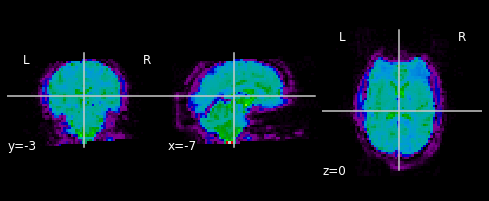

In [24]:
from nilearn.plotting import plot_epi

plot_epi(slice0)

Or we can plot multiple volumes of the same run

/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting d

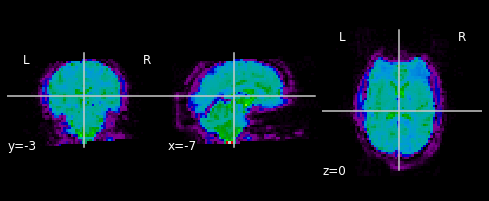

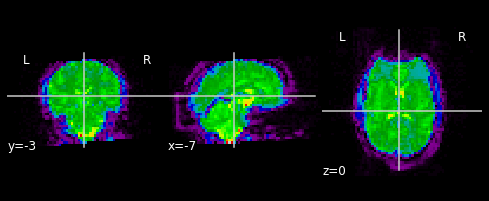

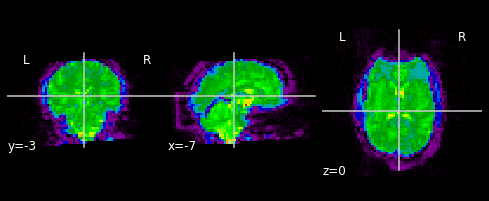

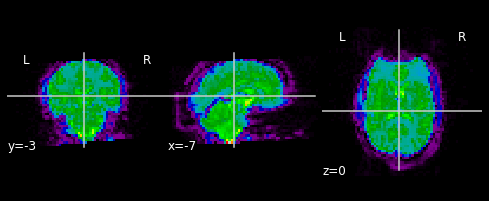

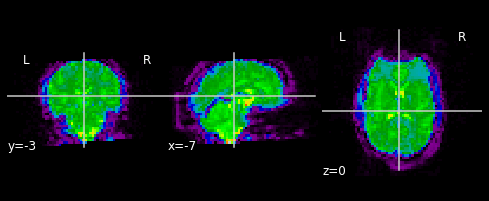

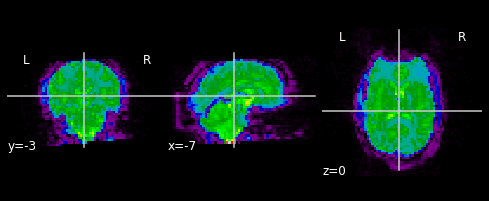

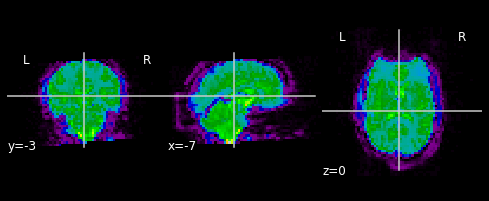

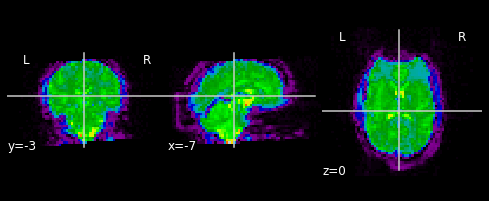

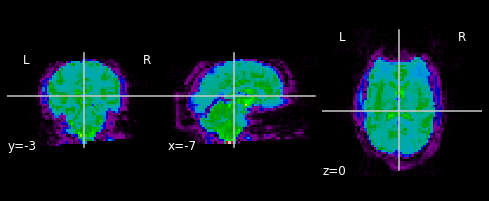

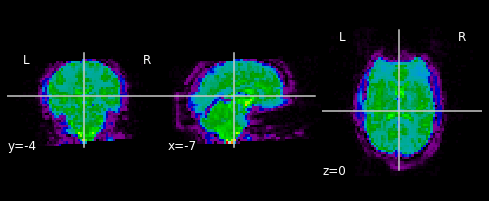

In [25]:
from nilearn.image import iter_img

#plot BOLD runs
for img in enumerate(iter_img(BOLD)):
    plot_epi(img[1])
    
    # only plot first 10 images
    if(img[0] == 9):
        break 

`plot_epi` gives more information than `plot_anat` when applied to functional images because it creates more contrast. Just for fun, let's apply `plot_epi` to the anatomical (T1) image.

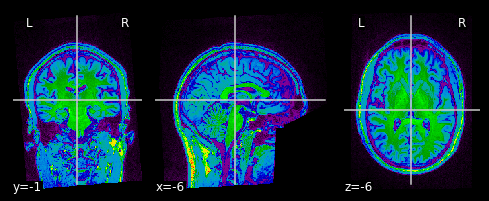

In [26]:
plot_epi(T1)

## Masking

To get better contrast within the brain in our BOLD volumes, we can compute and apply a mask with `nilearn.masking`. Masking is also a preliminary operation to plotting a time-series.

[[279. 287. 369. ... 343. 470. 452.]
 [284. 301. 371. ... 342. 471. 441.]
 [280. 295. 365. ... 345. 465. 454.]
 ...
 [411. 392. 464. ... 268. 380. 378.]
 [408. 395. 469. ... 254. 374. 379.]
 [407. 390. 475. ... 255. 379. 373.]]


/opt/anaconda3/envs/fmri-rep/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int8 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


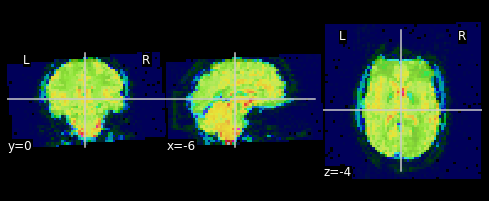

In [28]:
## Compute a mask based on the mean of all imgs and 
## apply it to BOLD volumes in run

from nilearn.masking import compute_epi_mask, apply_mask
mask = compute_epi_mask(BOLD)
BOLD_masked = apply_mask(BOLD, mask) 

# apply_mask returns an array
print(BOLD_masked)

from nilearn.plotting import plot_roi
plot_roi(index_img(BOLD, 2), mask)

Applying a mask before plotting offers better contrast. Note that some voxels still light up outside the brain, thus this type of masking is not a replacement for proper brain extraction/skull stripping.

## Time-series

Since we now have a masked BOLD run we can do basic plotting of the time series for a subset of the voxels in the run.

Of course, it is impossible to obtain any useful information from a plot that contains all the 21188 voxels in this image. 

In [29]:
BOLD_masked.shape

(137, 21188)

So for the following plot we will select only 5 voxels.

(0.0, 150.0)

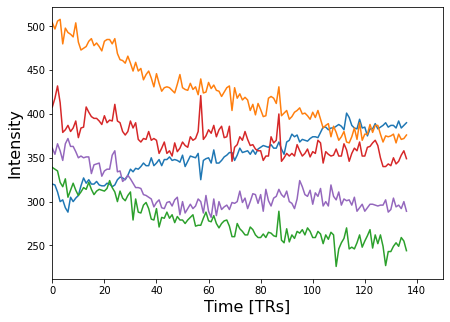

In [30]:
%matplotlib inline

plt.figure(figsize=(7,5))
plt.plot(BOLD_masked[:, 5:10])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0,150)

This minimal plot shows that there are is consistent variation in voxel intensities without drastic changes in recorded intensities, which may occur due to hardware or software malfunction.

## The events file

Finally, included with the brain data is a table that contains event onsets and durations which can be used to create a design matrix.

In [31]:
task_0 = pd.read_csv('../ds000115/sub-01/func/sub-01_task-letter0backtask_events.tsv',
                    sep = '\t', header = 0)
task_0

,onset,duration,trial_type,nback-nontarget,response_time
0,27.5,0.655357,nback-nontarget,0.714286,0.0
1,30.0,0.655357,nback-nontarget,-0.285714,0.0
2,37.5,0.655357,nback-nontarget,-0.285714,0.0
3,42.5,0.655357,nback-nontarget,-0.285714,0.0
4,47.5,0.655357,nback-nontarget,-0.285714,0.0
5,55.0,0.655357,nback-nontarget,0.714286,0.0
6,57.5,0.655357,nback-nontarget,-0.285714,0.0
7,65.0,0.655357,nback-nontarget,0.714286,0.0
8,70.0,0.655357,nback-nontarget,0.714286,0.0
9,72.5,0.655357,nback-nontarget,-0.285714,0.0


Creating the design matrix should be easy with `nilearn.stats`. Note: As of June 15 2020, only the development version of nilearn includes the stats module. 

In [37]:
from nilearn.stats.first_level_model import FirstLevelModel

glm = FirstLevelModel(t_r = 2.5, hrf_model='spm')
glm.fit(BOLD, task_0)
design_matrix = glm.design_matrices_[0]
print(design_matrix)

       nback-nontarget   drift_1   drift_2   drift_3   drift_4   drift_5  \
0.0                0.0  0.120816  0.120793  0.120753  0.120697  0.120626   
2.5                0.0  0.120753  0.120539  0.120182  0.119683  0.119042   
5.0                0.0  0.120626  0.120031  0.119042  0.117662  0.115895   
7.5                0.0  0.120435  0.119271  0.117339  0.114651  0.111225   
10.0               0.0  0.120182  0.118260  0.115081  0.110677  0.105096   
...                ...       ...       ...       ...       ...       ...   
330.0              0.0 -0.120182  0.118260 -0.115081  0.110677 -0.105096   
332.5              0.0 -0.120435  0.119271 -0.117339  0.114651 -0.111225   
335.0              0.0 -0.120626  0.120031 -0.119042  0.117662 -0.115895   
337.5              0.0 -0.120753  0.120539 -0.120182  0.119683 -0.119042   
340.0              0.0 -0.120816  0.120793 -0.120753  0.120697 -0.120626   

        drift_6  constant  
0.0    0.120539       1.0  
2.5    0.118260       1.0  
5.0

And the design matrix can be plotted also with nilearn.

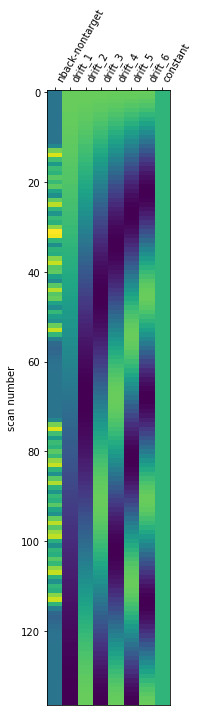

In [38]:
from nilearn.reporting import plot_design_matrix
plot_design_matrix(design_matrix)